# plot figure 1, figure S4 and generate Table S2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rec_slow_oran=np.loadtxt('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/oran.txt')
rec_slow_cal=np.loadtxt('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/cal_li.txt')
rec_slow_cal_tau=np.loadtxt('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/cal_tau.txt')
data_a=pd.read_csv('data_a.txt')
p_birth_mean=np.loadtxt('p_birth_mean.txt')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


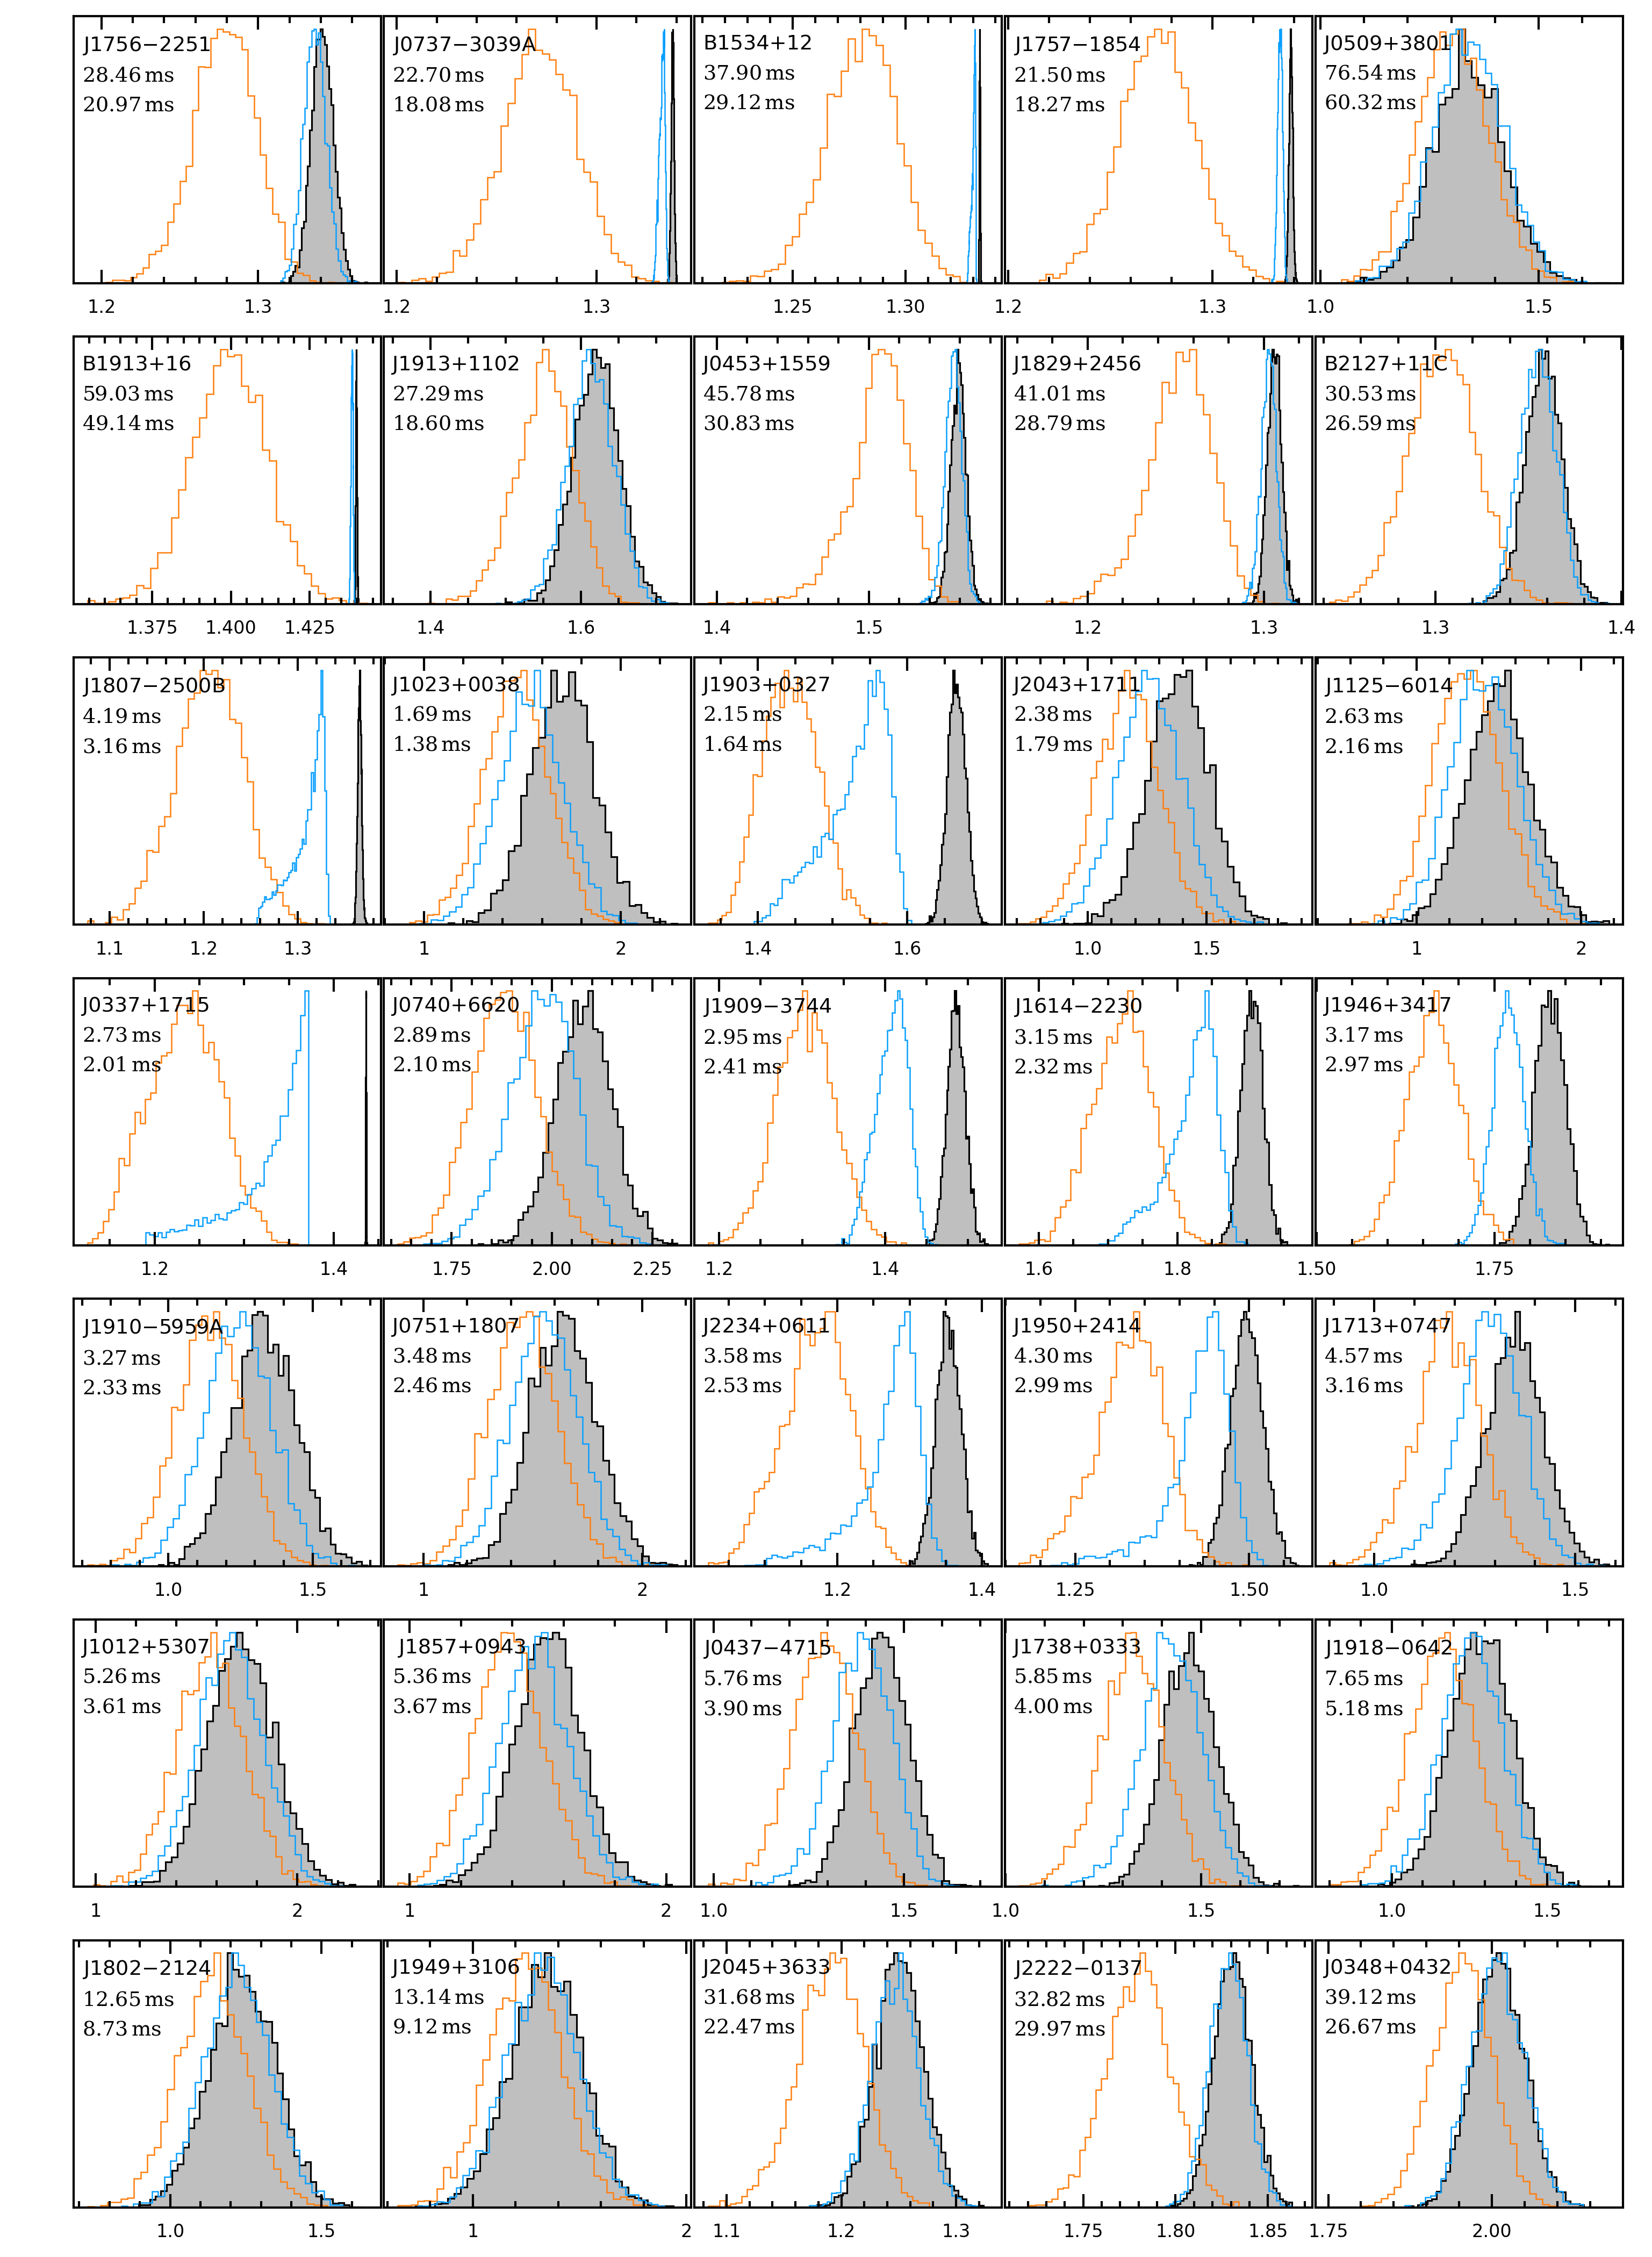

In [167]:
nli=pd.read_csv('new_name_test.txt')
from decimal import Decimal 
for i in range(35):
    label_names=nli['name'][i]
    plt.rcParams["figure.figsize"] = (6.2,9)
    plt.subplot(7,5,i+1) 
    
    p0_lab=Decimal(data_a['p0'][i]*1000).quantize(Decimal("0.00"))
    p0_mean_lab=Decimal(p_birth_mean[i]*1000).quantize(Decimal("0.00"))
    plt.grid(False)
    
    #plt.hist(rec_slow_oran[i*5000:(i+1)*5000],histtype='bar',bins=40,density=False,lw=0.3,ls='--',color='white',alpha=0.001,label=r'{}'.format(label_names))
    #plt.hist(rec_slow_cal[i*5000:(i+1)*5000],histtype='step',bins=40,density=False,lw=0.3,ls='--',color='white',alpha=0.001,label=r'$P_0={}\,ms$'.format(p0_lab))
    #plt.hist(rec_slow_cal_tau[i*5000:(i+1)*5000],histtype='step',bins=40,density=False,lw=0.3,ls='--',color='white',alpha=0.001,label=r'$\overline{{P}}_{{birth}}={}\,ms$'.format(p0_mean_lab))
    
    fre_num_oran, x_edge_oran = np.histogram(rec_slow_oran[i*5000:(i+1)*5000],bins=40)
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='grey',fill=True,alpha=0.5,ls='--') 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',fill=0,alpha=1,ls='-',lw=0.38) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='white',alpha=0.001,ls='--',label=r'{}'.format(label_names)) 
    
    fre_num_li, x_edge_li = np.histogram(rec_slow_cal[i*5000:(i+1)*5000],bins=40)
    plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.3,ls='-') 
    plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='white',lw=0.3,alpha=0.001,ls='--',label=r'${}\,\rm ms$'.format(p0_lab))

    fre_num_ta, x_edge_ta = np.histogram(rec_slow_cal_tau[i*5000:(i+1)*5000],bins=40)
    plt.stairs(fre_num_ta/np.max(fre_num_ta),x_edge_ta,color='#089FFF',lw=0.3,ls='-') 
    plt.stairs(fre_num_ta/np.max(fre_num_ta),x_edge_ta,color='white',lw=0.3,alpha=0.001,ls='--',label=r'${}\,\rm ms$'.format(p0_mean_lab))
    
    plt.xticks(fontsize=4)
    plt.yticks(fontsize=4)
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.01)

            
    plt.legend(loc='upper left',frameon=0,bbox_to_anchor=(-0.22,1),fontsize=4.6)
#plt.savefig('all_event.pdf')

# Table for all data 

In [4]:
data_all=pd.read_csv('data_combined.csv')
dm_li_mean=np.loadtxt('dm_li_mean.txt')
p0_mean=np.zeros(35)
for i in range(35):
    p0_mean[i]=Decimal(p_birth_mean[i]*1000).quantize(Decimal("0.0"))
mean_p_dm=np.zeros((35,2))
mean_p_dm[:,0]=p0_mean
mean_p_dm[:,1]=dm_li_mean
mean_p_dm_df=pd.DataFrame(mean_p_dm,columns=['mean_p','mean_dm'])
data_table=pd.concat([data_all, mean_p_dm_df], axis=1)

In [5]:
DNS_mass_sort_table=data_table[0:11].sort_values(by=['m'])
NSWD_mass_sort_table=data_table[11:].sort_values(by=['m'])

In [6]:
NSWD_mass_sort_table

,name,m,merr,mc,mcerr,p0,p1,pb,pmra,pmdec,...,gb,dl,pdot_int,tc,p0_birth_lim,p1_birth_lim,tc_b,tmax,mean_p,mean_dm
30,J1802-2124,1.2400,0.1100,0.7800,0.0,0.012648,7.256000e-20,0.698889,-0.850,4.800,...,0.611,0.760,7.117968e-20,2.815256,0.002462,3.656710e-19,0.106672,2.708584,8.7,0.0995
32,J2045+3633,1.2510,0.0210,0.8730,0.0,0.031682,5.883000e-19,32.297845,-3.200,-2.680,...,-3.926,5.629,5.939111e-19,0.845191,0.009059,2.077171e-18,0.069096,0.776095,22.5,0.0612
29,J1918-0642,1.2900,0.1000,0.2310,0.0,0.007646,2.569143e-20,10.913178,-7.149,-5.972,...,-9.123,1.111,2.369916e-20,5.111639,0.001239,1.463052e-19,0.134124,4.977515,5.2,0.1295
20,J1910-5959A,1.3300,0.1100,0.1800,0.0,0.003266,2.947030e-21,0.837113,-3.080,-3.970,...,-25.730,4.000,5.566276e-21,9.296989,0.001000,1.818049e-20,0.871486,8.425503,2.3,0.1900
31,J1949+3106,1.3400,0.1700,0.8100,0.0,0.013138,9.391300e-20,1.949535,-2.894,-5.093,...,2.554,7.468,9.326444e-20,2.231954,0.002810,4.361116e-19,0.102076,2.129878,9.1,0.0976
24,J1713+0747,1.3500,0.0700,0.2920,0.0,0.004570,8.529690e-21,67.825130,4.915,-3.914,...,25.223,1.149,8.144408e-21,8.890694,0.001000,3.722106e-20,0.425674,8.465020,3.2,0.1657
22,J2234+0611,1.3530,0.0170,0.2980,0.0,0.003577,1.201419e-20,32.001402,25.300,9.710,...,-43.006,0.971,6.373857e-21,8.890616,0.001000,2.279662e-20,0.695017,8.195599,2.5,0.1831
13,J2043+1711,1.3800,0.1300,0.1730,0.0,0.002380,5.243700e-21,1.482291,-5.722,-10.831,...,-15.313,1.562,4.195407e-21,8.987664,0.001000,9.984560e-21,1.586854,7.400809,1.8,0.2145
15,J0337+1715,1.4359,0.0003,0.1973,0.0,0.002733,1.766600e-20,1.629402,4.810,-4.420,...,-30.039,1.300,1.735079e-20,2.495290,0.001000,4.741258e-20,0.334174,2.161116,2.0,0.2026
27,J0437-4715,1.4400,0.0700,0.2240,0.0,0.005757,5.729215e-20,5.741046,121.439,-71.475,...,-41.963,0.157,1.401236e-20,6.510063,0.001000,8.067547e-20,0.196392,6.313670,3.9,0.1482


In [15]:
DNS_mass_sort_table

,name,m,merr,mc,mcerr,p0,p1,pb,pmra,pmdec,...,gb,dl,pdot_int,tc,p0_birth_lim,p1_birth_lim,tc_b,tmax,mean_p,mean_dm
8,J1829+2456,1.3060,0.0040,1.2990,0.0040,0.041010,5.250000e-20,1.176028,0.000,0.000,...,15.612,0.9150,5.501465e-20,11.810698,0.010744,2.099842e-19,0.093551,11.000000,28.8,0.0539
2,B1534+12,1.3330,0.0002,1.3455,0.0002,0.037904,2.422494e-18,0.420737,1.482,-25.285,...,48.341,1.0510,2.364362e-18,0.254005,0.017684,5.067896e-18,0.055286,0.198719,29.1,0.0532
1,J0737$-$3039A/B,1.3381,0.0007,1.2489,0.0007,0.022699,1.759928e-18,0.102252,0.000,0.000,...,-4.505,0.5200,1.760550e-18,0.204283,0.012510,3.194507e-18,0.062047,0.142236,18.1,0.0663
3,J1757$-$1854,1.3384,0.0009,1.3946,0.0009,0.021497,2.630300e-18,0.183538,0.000,0.000,...,2.877,19.5590,2.653844e-18,0.128343,0.014572,3.915112e-18,0.058971,0.069373,18.3,0.0657
4,J0509+3801,1.3400,0.0800,1.4600,0.0800,0.076541,7.931140e-18,0.379584,0.000,0.000,...,-1.187,1.5620,7.923556e-18,0.153053,0.040130,1.511294e-17,0.042071,0.110982,60.3,0.0367
0,J1756$-$2251,1.3410,0.0070,1.2300,0.0070,0.028462,1.017502e-18,0.319634,-2.420,0.000,...,0.948,0.7300,1.015396e-18,0.444109,0.010888,2.654394e-18,0.064988,0.379121,21.0,0.0626
9,B2127+11C,1.3580,0.0100,1.3540,0.0100,0.030529,4.987890e-18,0.335282,-1.300,-3.300,...,-27.315,10.4000,4.985330e-18,0.097026,0.022190,6.858989e-18,0.051257,0.045769,26.6,0.0545
10,J1807$-$2500B,1.3655,0.0021,1.2064,0.0021,0.004186,8.232450e-20,9.956668,0.000,0.000,...,-2.200,2.8973,1.100078e-19,0.602921,0.001847,2.493071e-19,0.117392,0.485529,3.2,0.1602
5,B1913+16,1.4398,0.0002,1.3886,0.0002,0.059030,8.628073e-18,0.322997,-0.720,-0.030,...,2.122,4.1670,8.644919e-18,0.108188,0.037268,1.369310e-17,0.043122,0.065066,49.1,0.0405
7,J0453+1559,1.5590,0.0050,1.1740,0.0040,0.045782,1.861200e-19,4.072469,-5.500,-6.000,...,-17.137,0.5220,1.819250e-19,3.987189,0.006388,1.303818e-18,0.077628,3.909561,30.8,0.0538


# plotting P_Mass

In [7]:
acc_li_mean=np.array([0.060320,0.065405,0.051486,0.065339,0.035818,0.039853,0.063203,0.048975,0.051140,0.054201,0.155542,0.237722,0.216242,0.207245,0.189246,0.195201,0.190535,0.179483,0.181169,0.162424,0.180163,0.175018, 0.172786,0.158392, 0.153948,0.143958, 0.142573,0.137744, 0.136522,0.119644,0.092763,0.090843,0.058007,0.051098,0.052854])

In [8]:
pran = np.loadtxt('plot_pran.txt')
pran_m_err=np.zeros((35,2))
for i in range(35):
    pran_m_err[i,0]=np.mean(pran[i*5000:(i+1)*5000])
    pran_m_err[i,1]=np.std(pran[i*5000:(i+1)*5000])

In [9]:
# mean p_ini in table
p_ran_mea=np.array([0.02154103, 0.01832751, 0.02957944, 0.01836437, 0.06110778,
       0.04939585, 0.01962485, 0.03268086, 0.02997666, 0.02668647,
       0.00324137, 0.00138748, 0.00167792, 0.00182558, 0.00218944,
       0.00205845, 0.00216064, 0.00243455, 0.00238953, 0.00297232,
       0.00241514, 0.0025591 , 0.00262603, 0.00312512, 0.00330807 ,
       0.003783416, 0.003857498, 0.004132  , 0.0042061 , 0.005477835,
       0.009111, 0.009500, 0.02330, 0.0300025 , 0.028065])


In [10]:
mean_err_obs=np.zeros((35,2))
mean_err_rec_slow_cal=np.zeros((35,2))
for i in range(35):
    mean_err_obs[i,0] = np.mean(rec_slow_oran[i*5000:(i+1)*5000])
    mean_err_obs[i,1] = np.std(rec_slow_oran[i*5000:(i+1)*5000])
    mean_err_rec_slow_cal[i,0]=np.mean(rec_slow_cal[i*5000:(i+1)*5000])
    mean_err_rec_slow_cal[i,1]=np.std(rec_slow_cal[i*5000:(i+1)*5000])

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


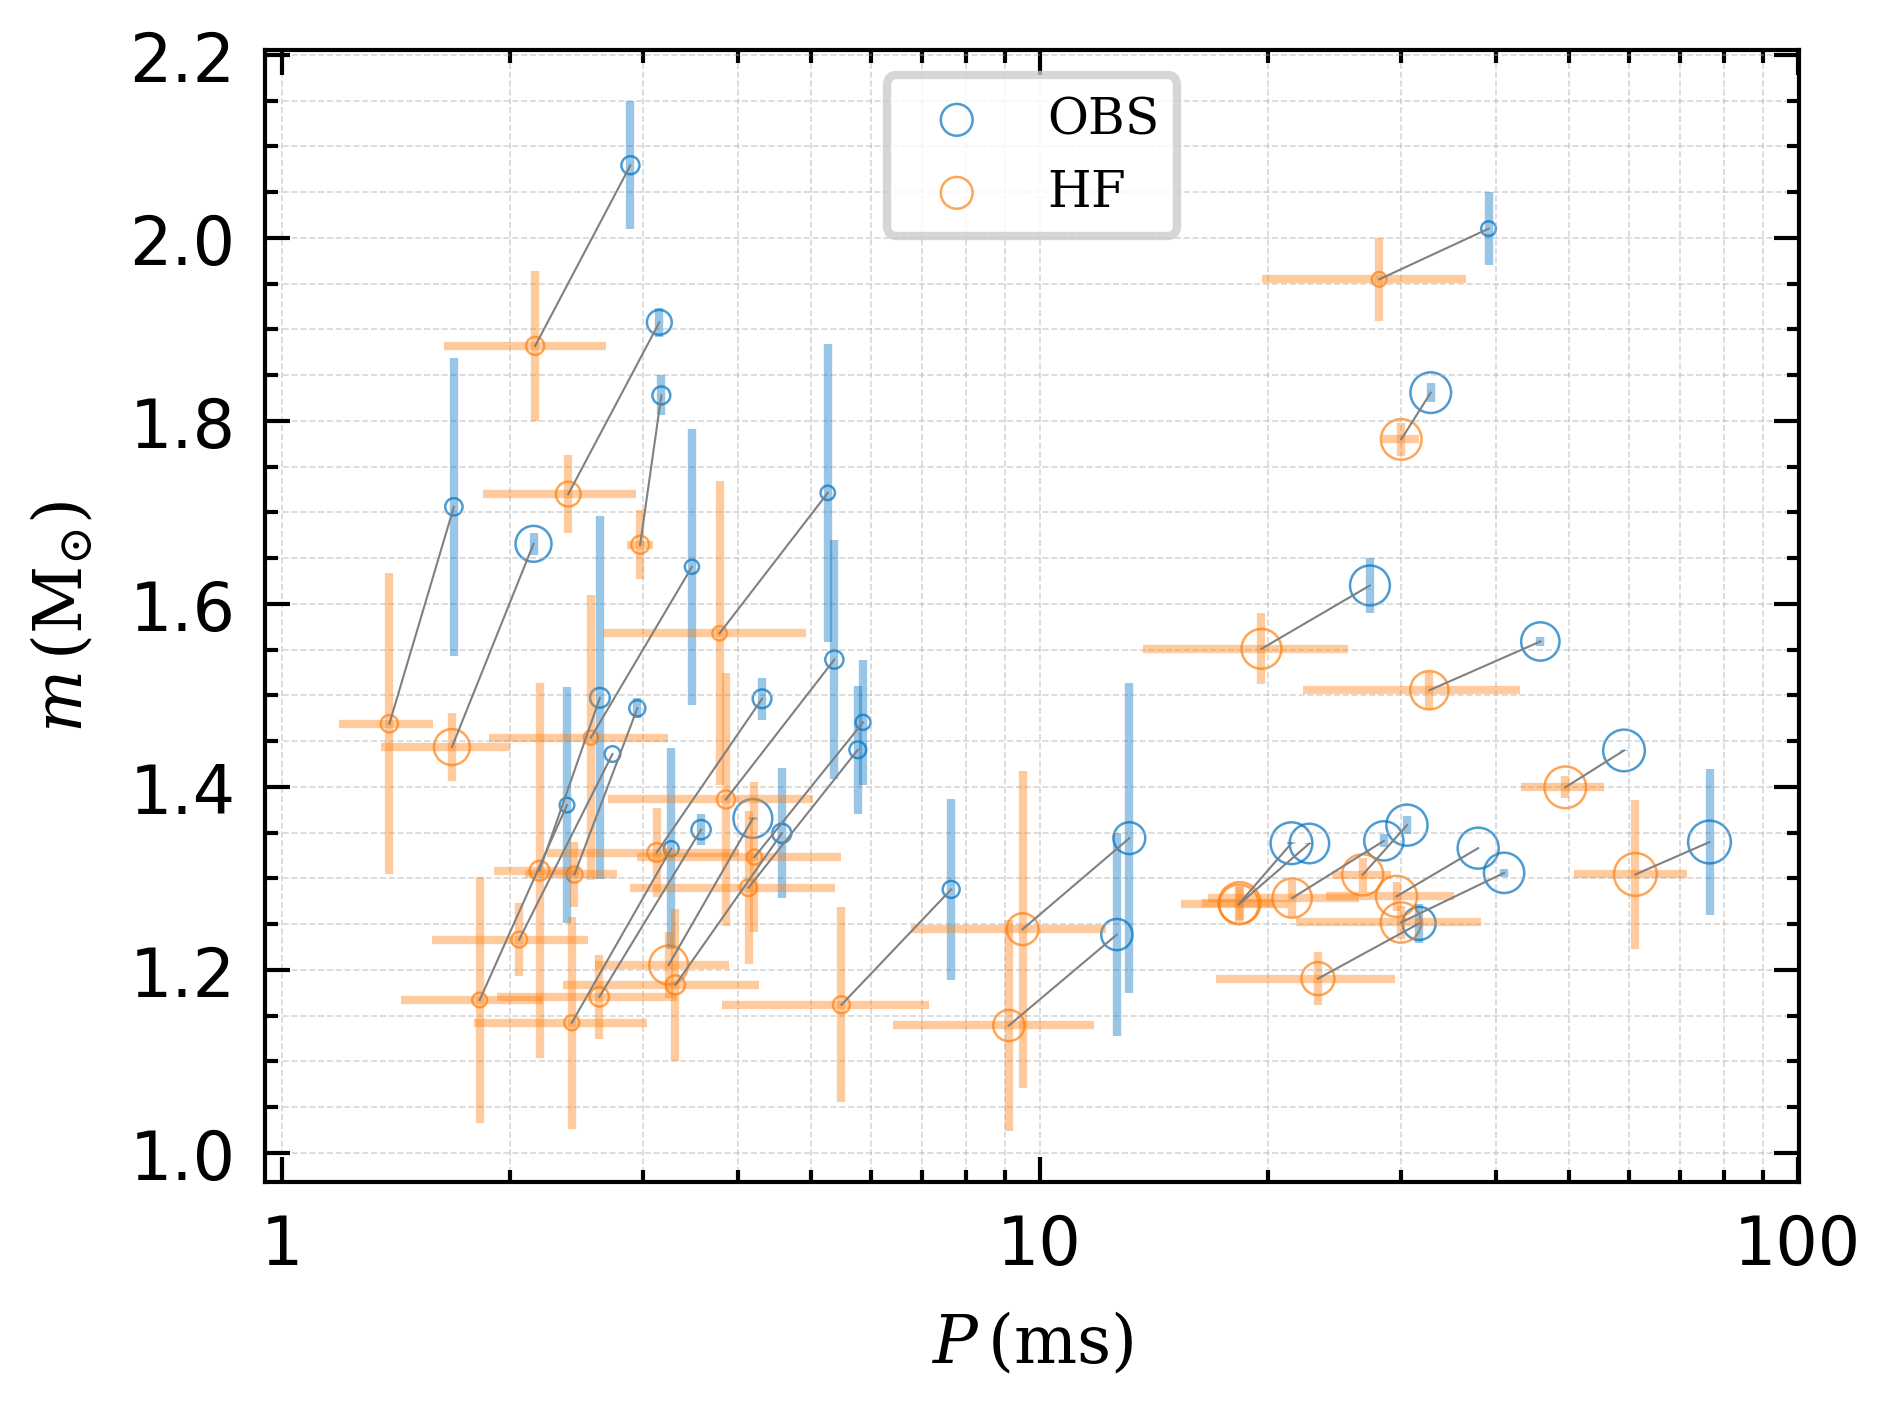

In [303]:
sv=np.array(data_a['mc'].values)*18
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

plt.grid(b=True, which='both',linestyle='--',lw=0.2,alpha=0.5)

plt.scatter(data_a['p0'], mean_err_obs[:,0], lw=0.3,marker="o", s=sv,edgecolors='#0072c1',facecolor='none',alpha=0.7,label=r'$\rm{OBS}$')
plt.errorbar(data_a['p0'], mean_err_obs[:,0], yerr=mean_err_obs[:,1], xerr=None, marker="o", ms=0.01,color='#0072c1',alpha=0.4,linestyle="none")

plt.scatter(p_ran_mea,mean_err_rec_slow_cal[:,0], lw=0.3, marker="o", s=sv,edgecolors='#ff7f0e',facecolor='none',alpha=0.7,label=r'$\rm{HF}$')
plt.errorbar(p_ran_mea, mean_err_rec_slow_cal[:,0],xerr=pran_m_err[:,1], yerr=mean_err_rec_slow_cal[:,1], marker="o",ms=0.01, color='#ff7f0e',alpha=0.4,linestyle="none")

for i in range(35):
    plt.plot([data_a['p0'][i],p_ran_mea[i]],[mean_err_obs[i,0],mean_err_rec_slow_cal[i,0]],
             linewidth=0.25,ls='-',color='grey',alpha=1)

plt.plot(data_a['p0'], mean_err_obs[:,0],lw=0.0,alpha=0)

plt.xscale('log')

locs, labels = plt.xticks()    
print(locs)
plt.xticks([1.e-5 ,1.e-4 ,1.e-3 ,1.e-2, 1.e-1, 1.e+0 ],['0.01','0.1','1','10','100','1000'])

plt.xlim(0.95*10**(-3),10.05*10**(-2))

plt.xlabel(r'$P\,(\rm{ms})$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')
plt.legend(frameon=1,loc='upper center',fontsize=6)
plt.savefig('P_Mass_OBS_HF.jpg')

# P-M related to flux density and spin-down luminosity

In [215]:
# flux density data from ATNF catalogs
16    J1756-2251        0.60
6     J0737-3039A       1.60
x      1534+12          0.6 
17    J1757-1854        0.25
5     J0509+3801           0
x     1913+16            0.90   
24    J1913+1102        0.02
4     J0453+1559           0
19    J1829+2456           0
x     2127+11c            0
x     1807-2500B          0
11    J1023+0038           0
21    J1903+0327        1.30
30    J2043+1711        0.28
x     j1125-6014           0
1     J0337+1715           0
8     J0740+6620        1.10
22    J1909-3744        2.50
13    J1614-2230        1.20
27    J1946+3417        0.90
23    J1910-5959A       0.21
9     J0751+1807        3.20
34    J2234+0611        0.60
29    J1950+2414        0.12
14    J1713+0747        9.10
10    J1012+5307        3.80
20    J1857+0943        4.00
3     J0437-4715      150.20
15    J1738+0333        0.67
26    J1918-0642        0.58
18    J1802-2124        0.77
28    J1949+3106        0.23
31    J2045+3633           0
33    J2222-0137           0
2     J0348+0432           0


0.8646647167633873

In [18]:
flux_1400=np.array([0.60,1.60,0.6 , 0.25,0,0.90,   0.02,  0,  0,  0, 0, 0,1.30, 0.28,0, 0, 1.10,2.50,1.20,0.90, 0.21, 3.20, 0.60, 0.12, 9.10, 3.80, 4.00, 150.20,0.67,0.58,0.77,0.23, 0, 0, 0])
 #change 150.2 to  15.02

def spin_down_lum(p,pdot):
    return 3.95*10**(31) * (pdot/10**(-15)) * p**(-3)

spin_d_lu=np.zeros(35)
spin_d_lu_ms=np.zeros(35)
spin_d_lu=spin_down_lum(data_a['p0'],data_a['p1'])
spin_d_lu_ms=(spin_d_lu/10**(33)).astype('float64')


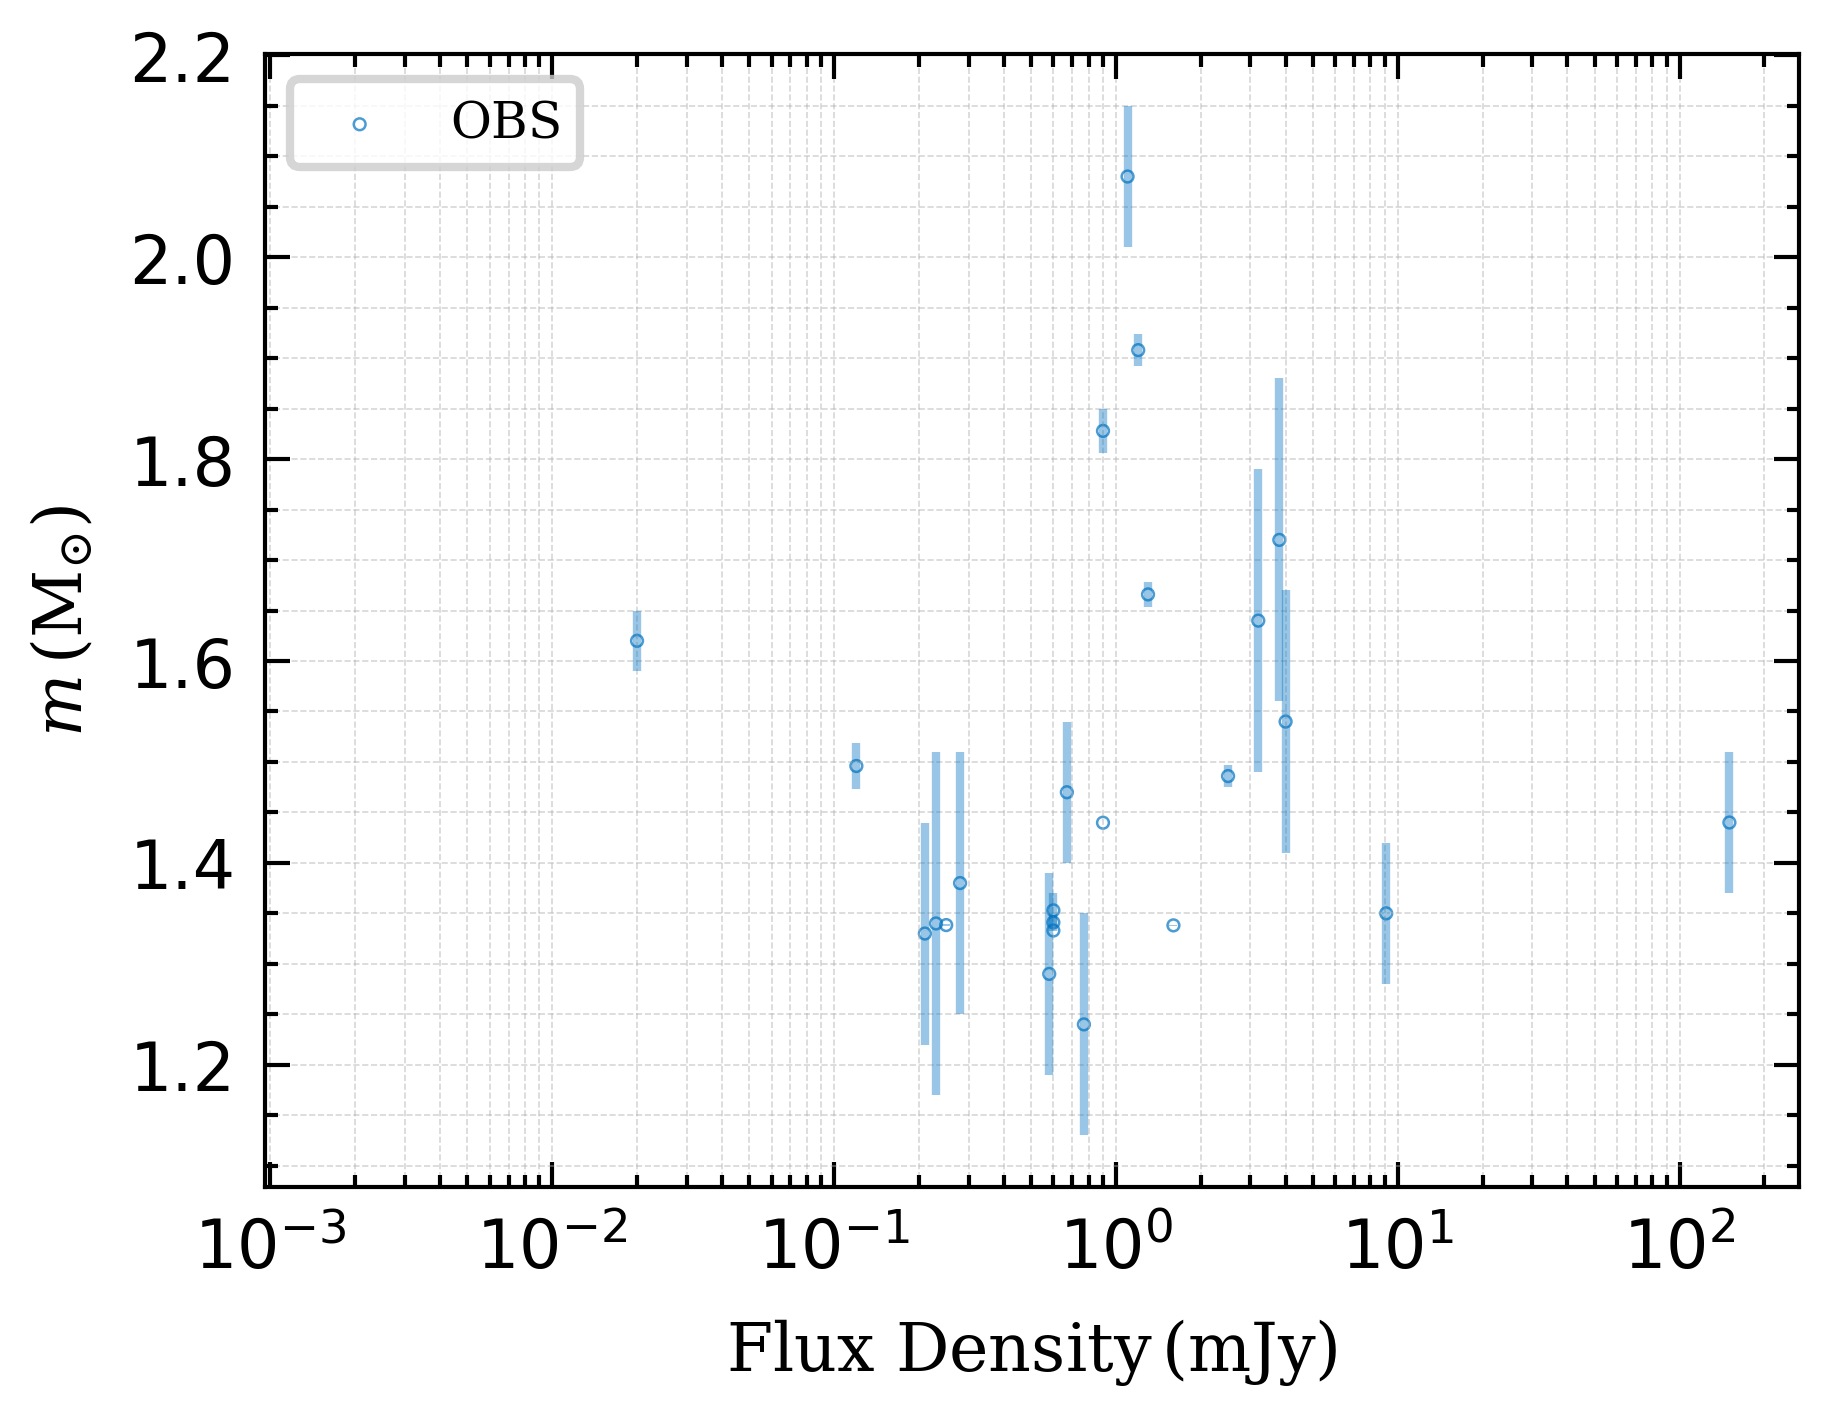

In [119]:
sv=np.array(flux_1400)*4
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

plt.grid(b=True, which='both',linestyle='--',lw=0.2,alpha=0.5)

plt.scatter(flux_1400, data_a['m'], lw=0.3,marker="o", s=2,edgecolors='#0072c1',facecolor='none',alpha=0.7,label=r'$\rm{OBS}$')
plt.errorbar(flux_1400, data_a['m'], yerr=data_a['merr'], xerr=None, marker="o", ms=0.01,color='#0072c1',alpha=0.4,linestyle="none")

#plt.scatter(p_ran_mea,mean_err_rec_slow_cal[:,0], lw=0.3, marker="o", s=sv,edgecolors='#ff7f0e',facecolor='none',alpha=0.7,label=r'$\rm{HF}$')
#plt.errorbar(p_ran_mea, mean_err_rec_slow_cal[:,0],xerr=pran_m_err[:,1], yerr=mean_err_rec_slow_cal[:,1], marker="o",ms=0.01, color='#ff7f0e',alpha=0.4,linestyle="none")

#for i in range(35):
#    plt.plot([data_a['p0'][i],p_ran_mea[i]],[mean_err_obs[i,0],mean_err_rec_slow_cal[i,0]],
#             linewidth=0.25,ls='-',color='grey',alpha=1)

plt.plot(data_a['p0'], mean_err_obs[:,0],lw=0.0,alpha=0)

plt.xscale('log')


locs, labels = plt.xticks()    
#print(locs)
#plt.xticks([1.e-5 ,1.e-4 ,1.e-3 ,1.e-2, 1.e-1, 1.e+0 ],['0.01','0.1','1','10','100','1000'])

#plt.xlim(0.95*10**(-3),10.05*10**(-2))
#plt.xlim(-1,10)
plt.xlabel(r'$\rm Flux\,\,Density\,(mJy)$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')
plt.legend(frameon=1,loc='upper left',fontsize=6)
plt.savefig('P_Mass_flux.jpg')

# $I \simeq(0.237 \pm 0.008) M R^{2}\left[1+4.2 \frac{M \mathrm{~km}}{M_{\odot} R}+90\left(\frac{M \mathrm{~km}}{M_{\odot}R}\right)^{4}\right]$，An analogous fit has also been suggested by Bejger \& Haensel (2002): $I \simeq \frac{2}{9}\left(1+5 \frac{M \mathrm{~km}}{R M_{\odot}}\right)$, see James M. Lattimer and Bernard F. Schutz 2005 ApJ 629 979.

In [83]:
import astropy.units as unit
import astropy.constants as const

In [113]:
def spin_down_luminosity(mass, pdot, p):
    r=12
    return ( ( ( 4*np.pi**2 * ( 0.237 * mass* unit.solMass * r*unit.km* r *unit.km* ( 1 +4.2*(mass/r) + 90*(mass/r)**4  ) ) * 
            pdot *(p*unit.s)**(-3) ).decompose() ).to(unit.erg / unit.s) ).value

def err_I(M):
    R=12
    return 0.008 *M* unit.solMass *R*unit.km*R*unit.km * (1 +4.2*(M/R) + 90*(M/R)**4  )

def err_spin_down_luminosity(M,pdot,p):
    return  ( ( (4*np.pi**2 * err_I(M) *pdot *(p*unit.s)**(-3)).decompose() ).to(unit.erg / unit.s) ).value

spin_down_lum = np.zeros(35)
err_I_values = np.zeros(35)
for i in range(35):
    spin_down_lum[i] = spin_down_luminosity(data_a['m'][i],data_a['p1'][i],data_a['p0'][i])
    err_I_values[i]=err_spin_down_luminosity(data_a['m'][i],data_a['p1'][i],data_a['p0'][i])

No handles with labels found to put in legend.


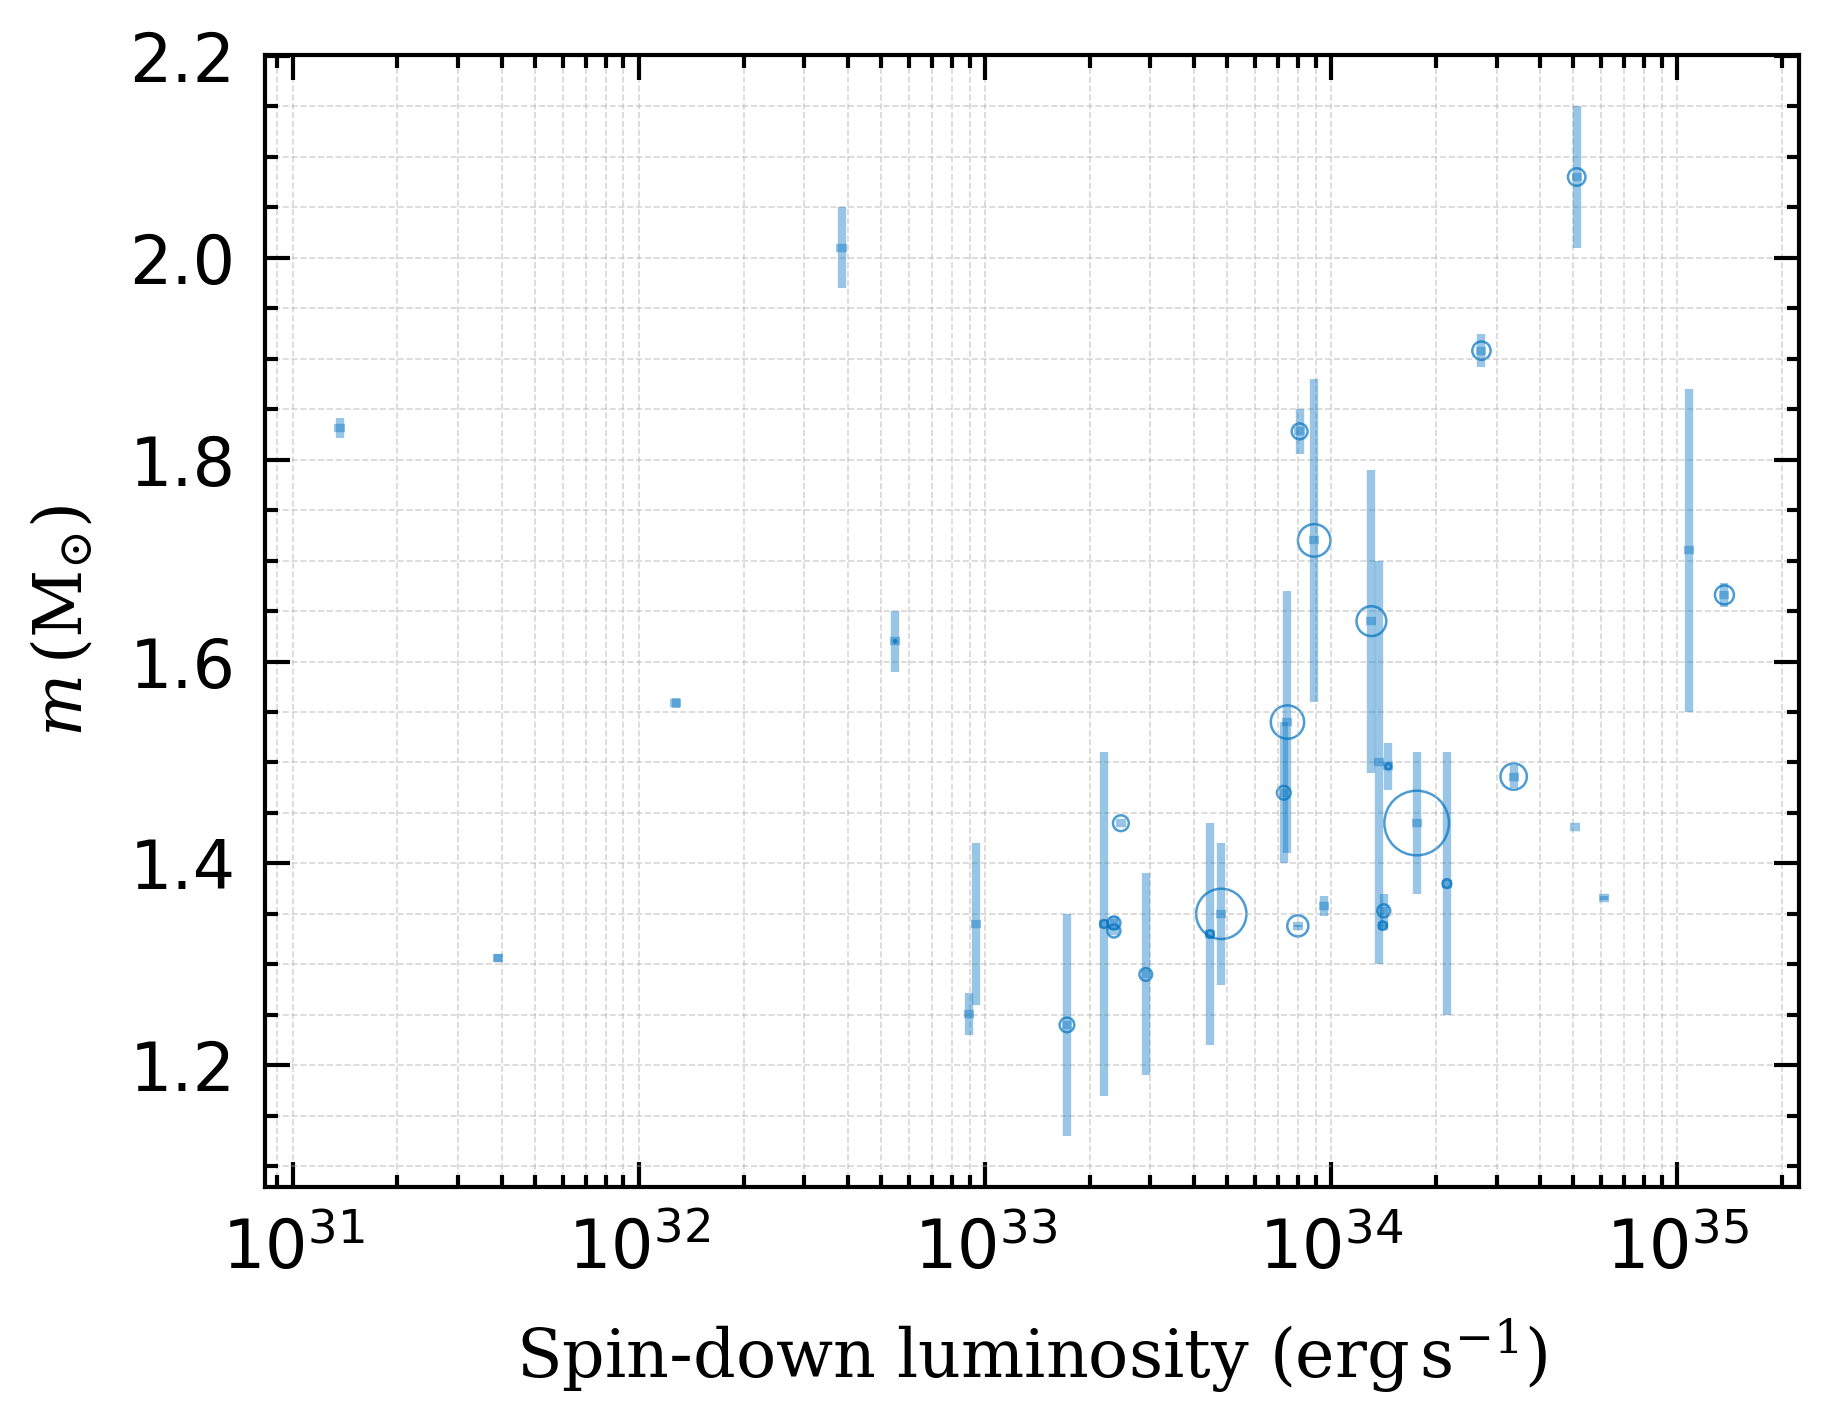

In [166]:
flux_1400=np.array([0.60,1.60,0.6 , 0.25,0,0.90,   0.02,  0,  0,  0, 0, 0,1.30, 0.28,0, 0, 1.10,2.50,1.20,0.90, 0.21, 3.20, 0.60, 0.12, 9.10, 3.80, 4.00, 15.020,0.67,0.58,0.77,0.23, 0, 0, 0])
sv=np.array(flux_1400)*4
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

plt.grid(b=True, which='both',linestyle='--',lw=0.2,alpha=0.5)

plt.scatter(spin_down_lum, data_a['m'], lw=0.3,marker="o", s=sv,edgecolors='#0072c1',facecolor='none',alpha=0.7)
plt.errorbar(spin_down_lum, data_a['m'], xerr= err_I_values, yerr=data_a['merr'], marker="o", ms=0.01,color='#0072c1',alpha=0.4,linestyle="none")

plt.xscale('log')



plt.xlabel(r'$\rm Spin$-$\rm down\,\,luminosity\,\,(erg\,s^{-1})$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')
plt.legend(frameon=0,loc='upper left',fontsize=6)
plt.savefig('P_Mass_spin_d_lu_flux.jpg')

/tmp/ipykernel_39754/1290045969.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


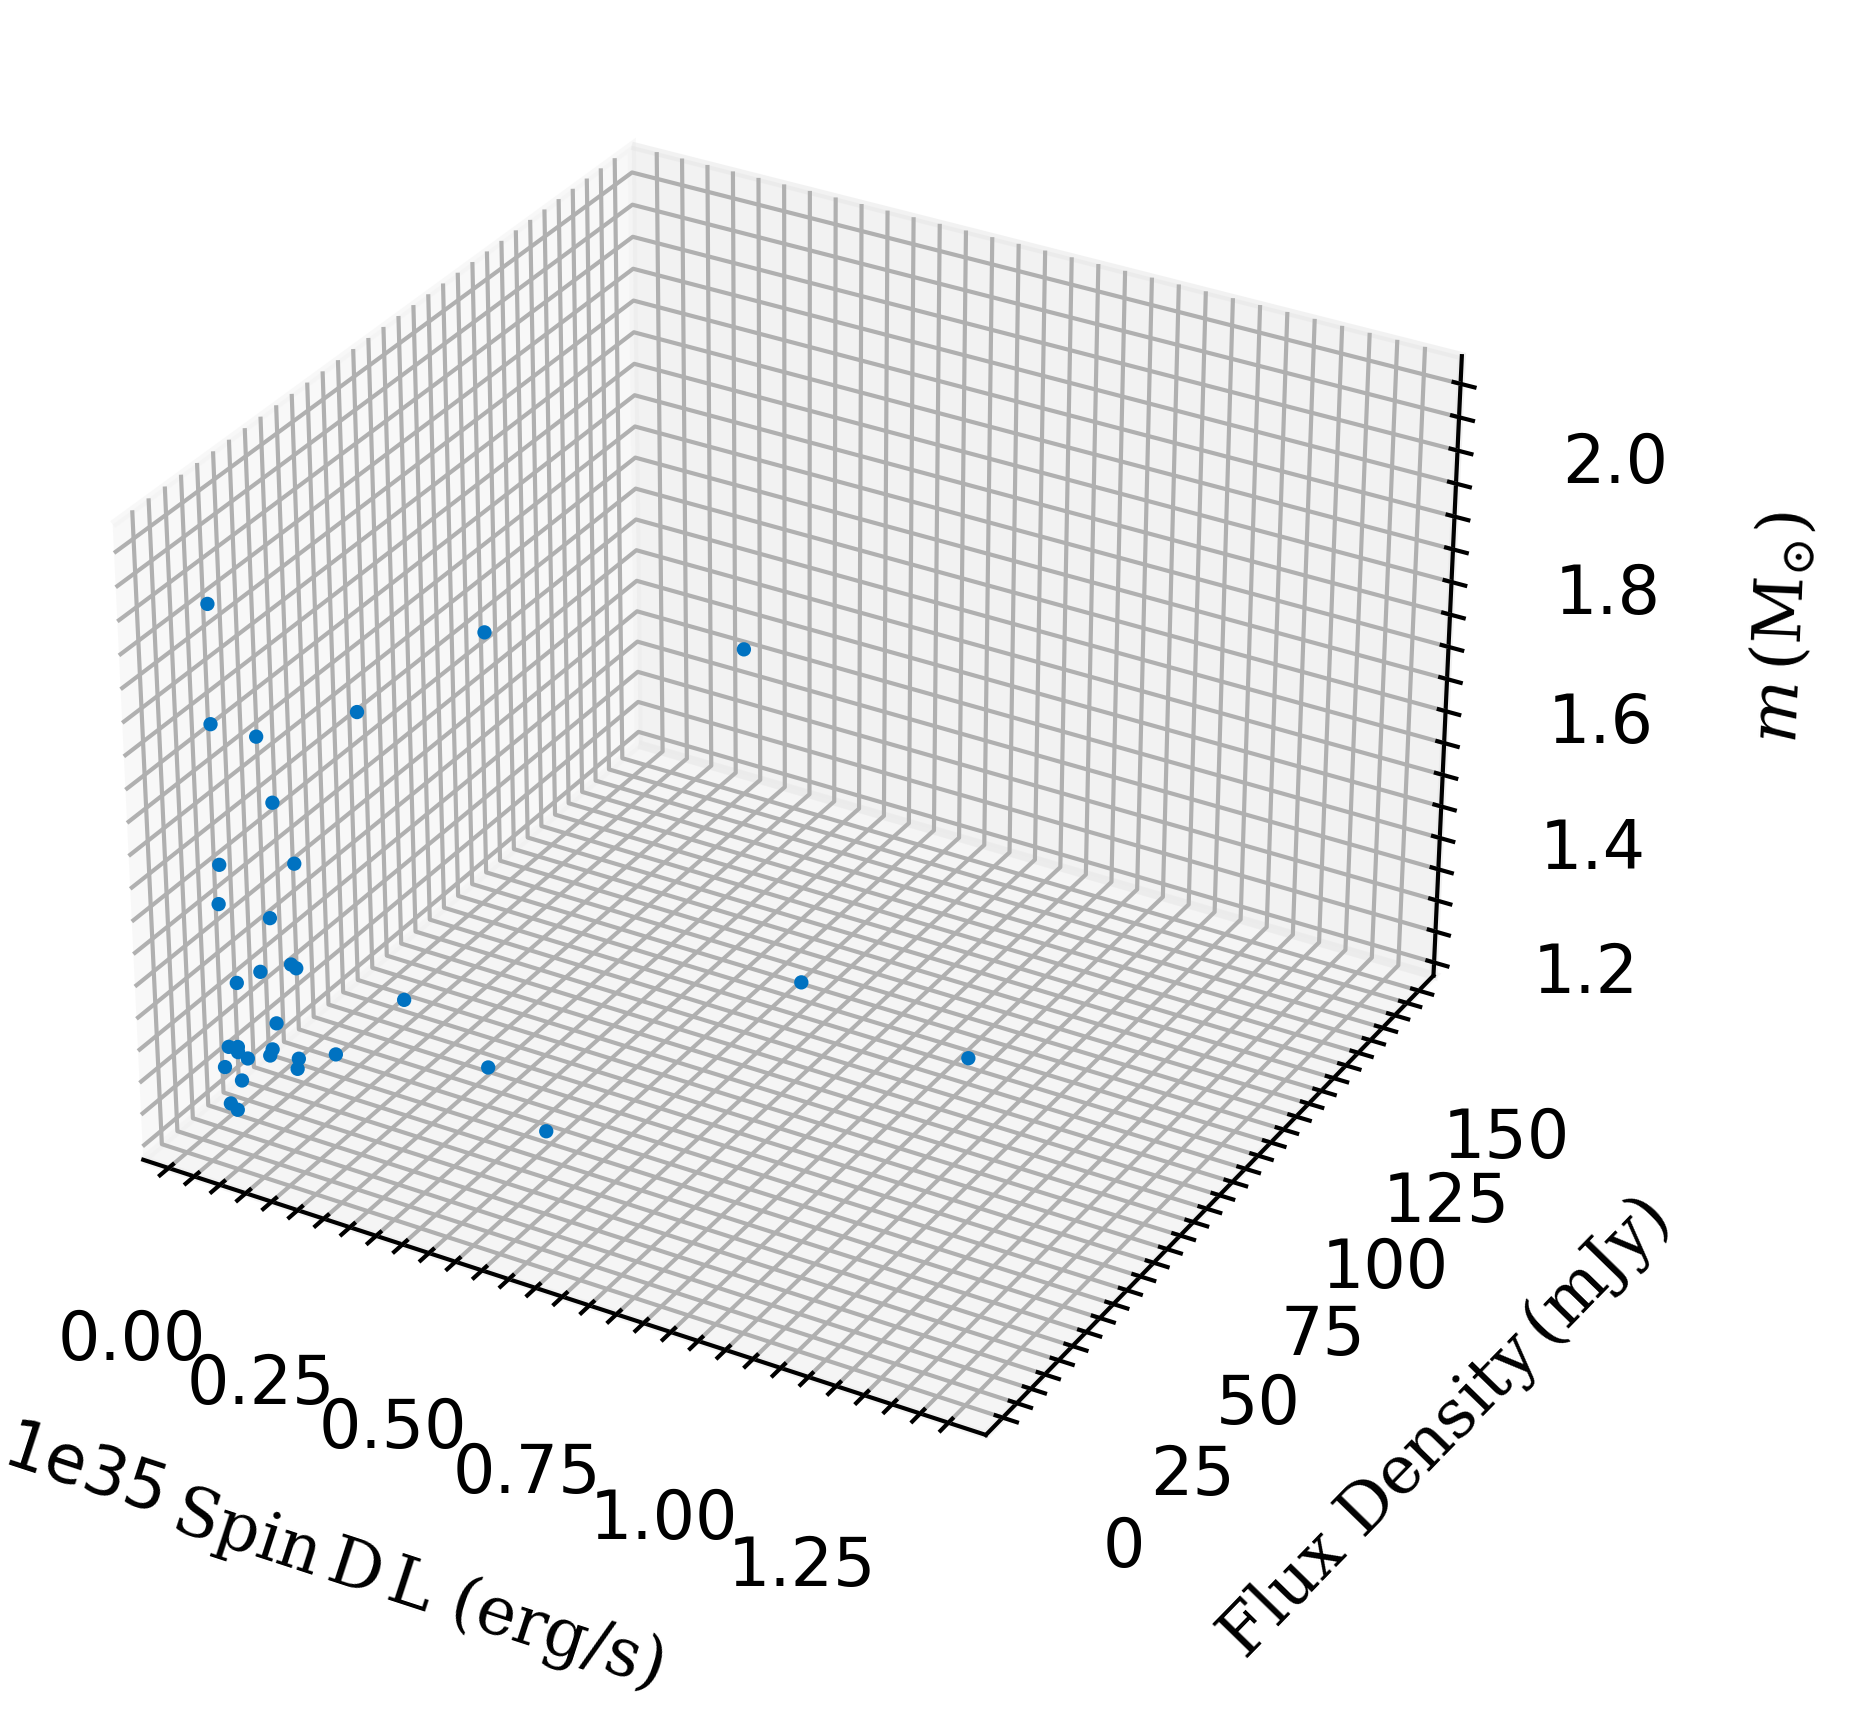

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
#plt.style.use(['science','ieee','no-latex'])
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(xs=spin_down_lum, ys=flux_1400,zs=data_a['m'],lw=0.3,marker="o", s=2,edgecolors='#0072c1',facecolor='#0072c1',alpha=1,label=r'$\rm{OBS}$')

#ax.errorbar(spin_down_lum, flux_1400, data_a['m'],  xerr = err_I_values,  yerr='none' , zerr=data_a['merr'])

ax.set_xlabel(r'$\rm Spin\,D\,L\,\,(erg/s)$')
ax.set_zlabel(r'$m\,(\rm{M_{\odot}})$')
ax.set_ylabel(r'$\rm Flux\,\,Density\,(mJy)$')
#ax.set_xscale('log')
#ax.set_zscale('log')
plt.savefig('3D_f_m_l.jpg')

# unify the mean $P_{ini}$ and $Delta m$ in tabel and figure

In [ ]:
# mean p_ini in table instead the p_means in all event figure
p_ran_mea=np.array([0.02154103, 0.01832751, 0.02957944, 0.01836437, 0.06110778,
       0.04939585, 0.01962485, 0.03268086, 0.02997666, 0.02668647,
       0.00324137, 0.00138748, 0.00167792, 0.00182558, 0.00218944,
       0.00205845, 0.00216064, 0.00243455, 0.00238953, 0.00297232,
       0.00241514, 0.0025591 , 0.00262603, 0.00312512, 0.00330807 ,
       0.003783416, 0.003857498, 0.004132  , 0.0042061 , 0.005477835,
       0.009111, 0.009500, 0.02330, 0.0300025 , 0.028065])

# plotting  figure 6 in Tauris12 and eq. 15

In [173]:
import astropy.units as unit
import astropy.constants as const

const_I = 1.4e45 * unit.g * unit.cm**2
rmag = 22 * unit.km
coeff = 3 * np.pi * const_I / (const.G * rmag)**0.5 / unit.solMass**1.5
def p_min(m,delta_m):
    """
    calculate the minimum spin period of NS 
    paramaters:
    ----
    m: initial NS mass, unit: solar mass
    delta_m: accreted mass by NS , unit: solar mass
    ----
    return:
    the minimum spin period, unit: s
    """
    return coeff.decompose()/ (m**(3/2) - (m-delta_m)**(3/2) )

def meq(m,p):
    return m - (m**(3/2) - (coeff/ (p*unit.s)).decompose() )**(2/3)

def tauris_acc_m(p_eq,m_ini):
    """
    calculate an accreted mass given an equilibrium period
    using an initial mass of 1.4 M_Sun
    see https://arxiv.org/abs/1206.1862  Eq.14
    paramaters:
    -----
    p_eq: the period at equilibrium state, unit: s
    -----
    return :
    the accreted mass, unit: Solar mass
    """
    return 0.22*(m_ini**(1/3))/(p_eq*1000)**(4/3)

/home4/yzq/anaconda3/envs/jupyter/lib/python3.8/site-packages/astropy/units/quantity.py:614: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/tmp/ipykernel_7230/744309588.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,0.3)


Text(0, 0.5, '$\\rm {\\Delta M}_{eq}\\, (M_{\\odot})$')

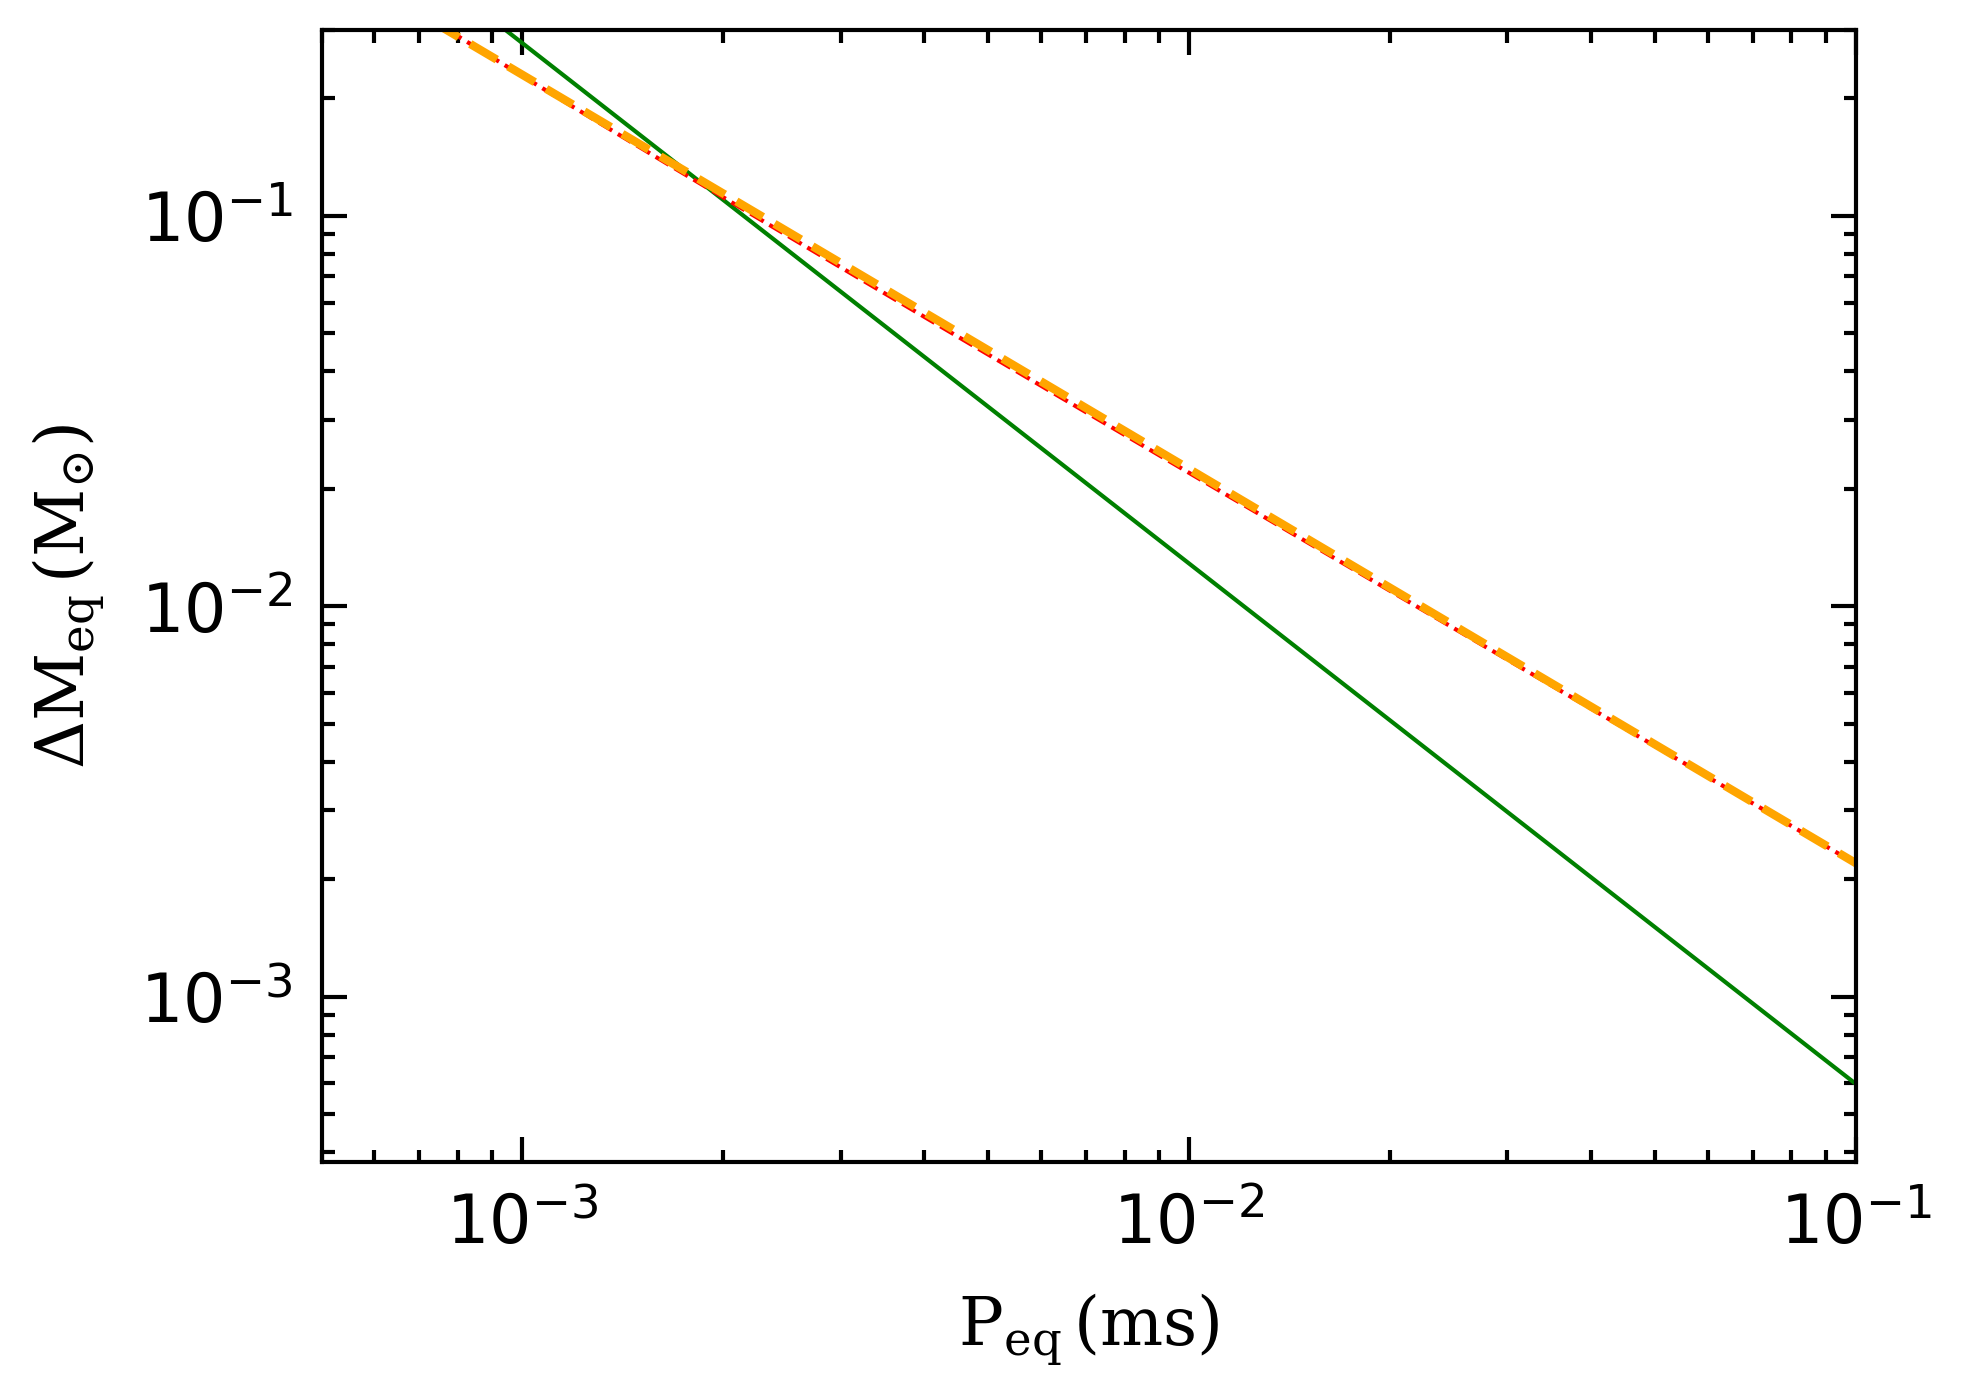

In [257]:
delta_m=np.linspace(0.001,0.3,1000)
peq=np.linspace(0.0001,0.1,1000)

def red_dosh(p):
    return 0.23*(p)**(-1.01)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
# plt.plot(peq,tauris_acc_m(peq,1.0),ls='-',lw=0.5,color='green')
# plt.plot(peq,tauris_acc_m(peq,1.2),ls='-',lw=0.5,color='green')
# plt.plot(peq,tauris_acc_m(peq,1.4),ls='-',lw=0.5,color='green')
# plt.plot(peq,tauris_acc_m(peq,1.6),ls='-',lw=0.5,color='green')
# plt.plot(peq,tauris_acc_m(peq,1.8),ls='-',lw=0.5,color='green')
plt.plot(peq,tauris_acc_m(peq,2.0),ls='-',lw=0.5,color='green')

plt.plot(p_min(1.4,delta_m),delta_m,ls='--',lw=0.5,color='r' )

plt.plot(peq,red_dosh(peq*1000),ls='--',color='orange')

plt.plot(peq,meq(1.4,peq/1000),ls='--',lw=0.5,color='r' )


plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0005,0.1)
plt.ylim(0,0.3)
plt.xlabel(r'$\rm P_{eq}\, (ms)$')
plt.ylabel(r'$\rm {\Delta M}_{eq}\, (M_{\odot})$')